In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import phik
from scipy.stats import chi2_contingency
# Load the dataset
file_path = 'obesity_data.csv'
obesity_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset for an overview
obesity_data.tail()


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight
999,66,Female,178.537130,74.962164,23.517168,1,Normal weight


In [3]:
# Descriptive statistics and information about the dataset
dataset_info = obesity_data.info()
dataset_description = obesity_data.describe()
missing_values = obesity_data.isnull().sum()

dataset_info, dataset_description, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


(None,
                Age       Height       Weight          BMI  \
 count  1000.000000  1000.000000  1000.000000  1000.000000   
 mean     49.857000   170.052417    71.205769    24.888317   
 std      18.114267    10.309971    15.509849     6.193912   
 min      18.000000   136.115719    26.065730     8.470572   
 25%      35.000000   163.514205    61.129629    20.918068   
 50%      50.000000   169.801665    71.929072    24.698647   
 75%      66.000000   177.353596    81.133746    28.732132   
 max      79.000000   201.419670   118.907366    50.791898   
 
        PhysicalActivityLevel  
 count            1000.000000  
 mean                2.534000  
 std                 1.116284  
 min                 1.000000  
 25%                 2.000000  
 50%                 3.000000  
 75%                 4.000000  
 max                 4.000000  ,
 Age                      0
 Gender                   0
 Height                   0
 Weight                   0
 BMI                      0
 Phy

In [4]:
# Setting the display format to two decimal places for numerical values
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Re-displaying the descriptive statistics with the new format
dataset_description = obesity_data.describe()
dataset_description


,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,49.86,170.05,71.21,24.89,2.53
std,18.11,10.31,15.51,6.19,1.12
min,18.00,136.12,26.07,8.47,1.00
25%,35.00,163.51,61.13,20.92,2.00
50%,50.00,169.80,71.93,24.70,3.00
75%,66.00,177.35,81.13,28.73,4.00
max,79.00,201.42,118.91,50.79,4.00


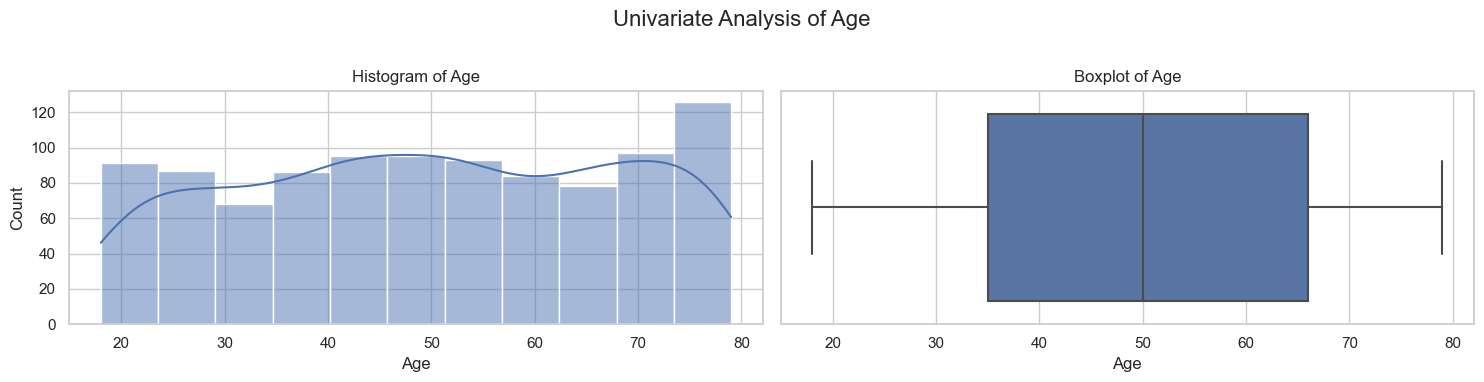

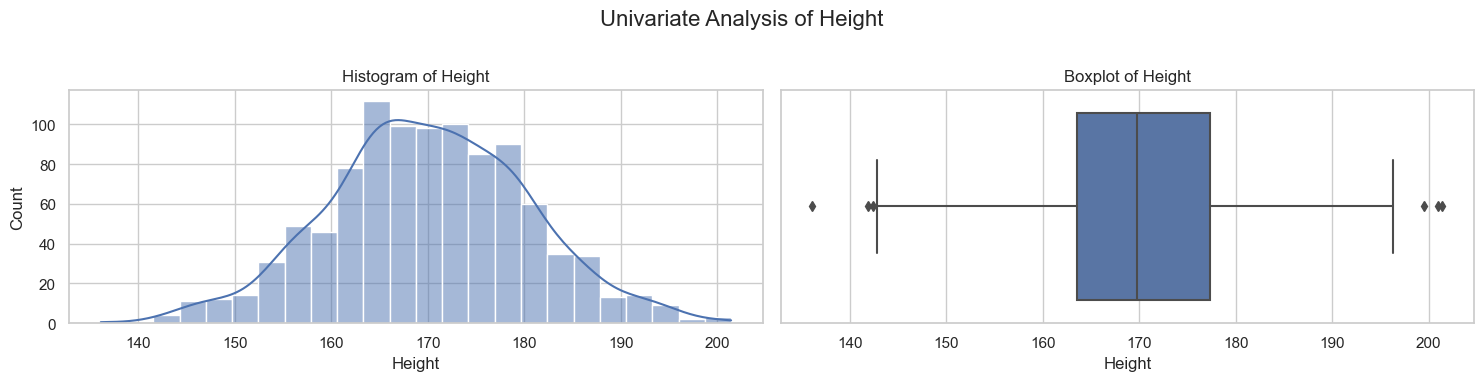

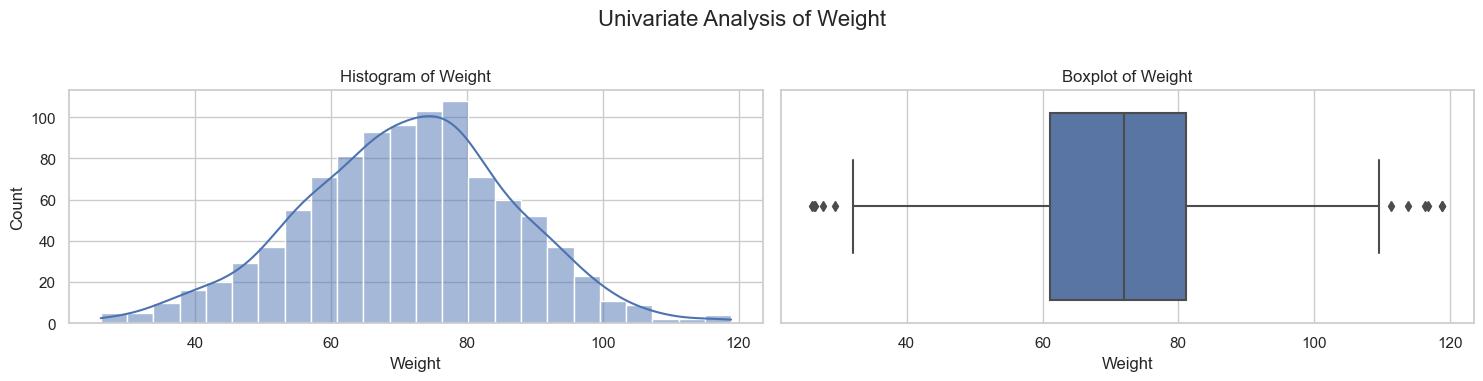

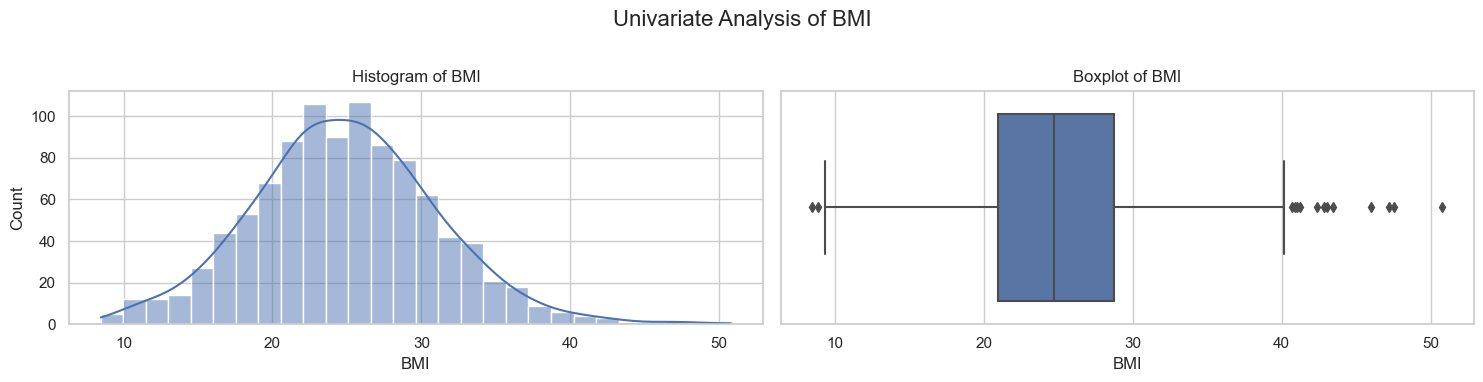

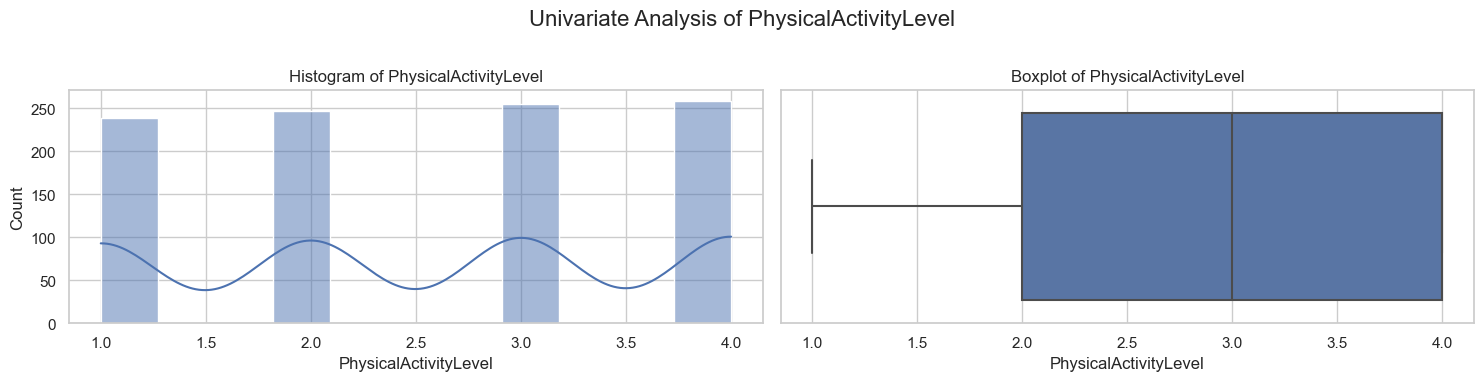

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# List of numerical columns
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']

for i, col in enumerate(num_cols):
    # Plotting histograms and boxplots for each numerical variable
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    fig.suptitle(f'Univariate Analysis of {col}', fontsize=16)
    
    # Histogram
    sns.histplot(obesity_data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=obesity_data[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    
    # Save the figure
    plt.savefig(f'{col}_analysis.png')

plt.show()

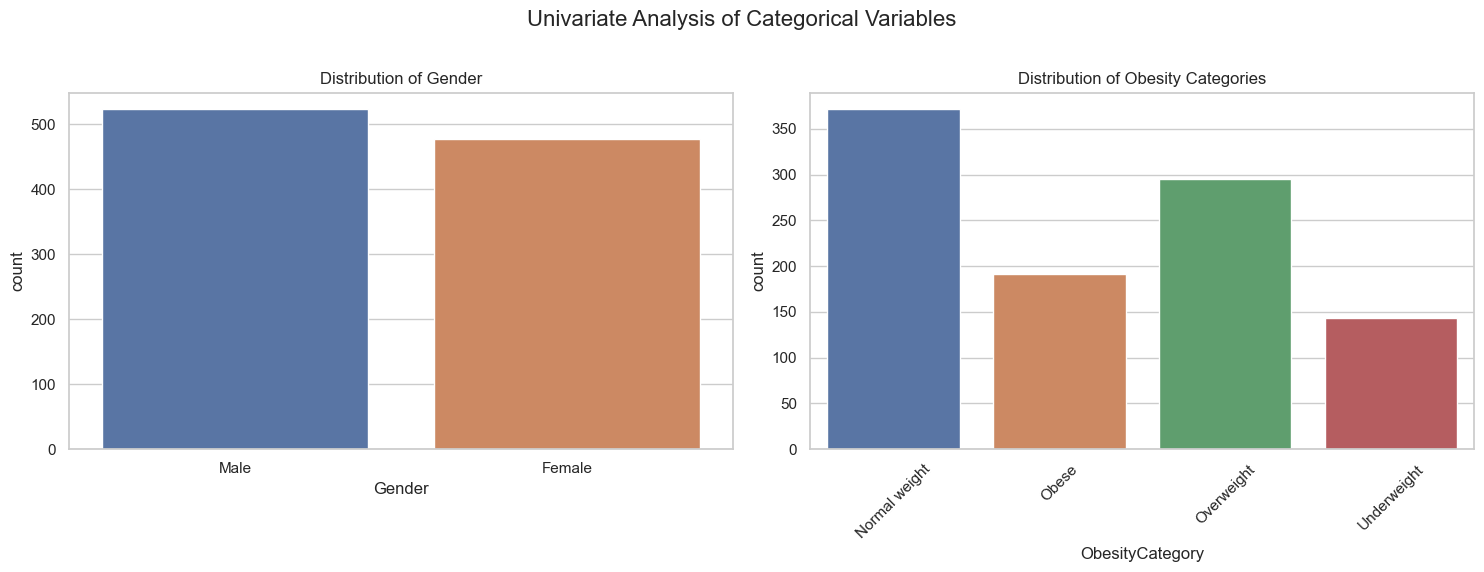

In [6]:
# Plotting count plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Univariate Analysis of Categorical Variables', fontsize=16)

# Plotting for Gender
sns.countplot(x='Gender', data=obesity_data, ax=axes[0])
axes[0].set_title('Distribution of Gender')

# Plotting for Obesity Category
sns.countplot(x='ObesityCategory', data=obesity_data, ax=axes[1])
axes[1].set_title('Distribution of Obesity Categories')
axes[1].tick_params(axis='x', rotation=45)  # Rotating the x-axis labels for readability

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


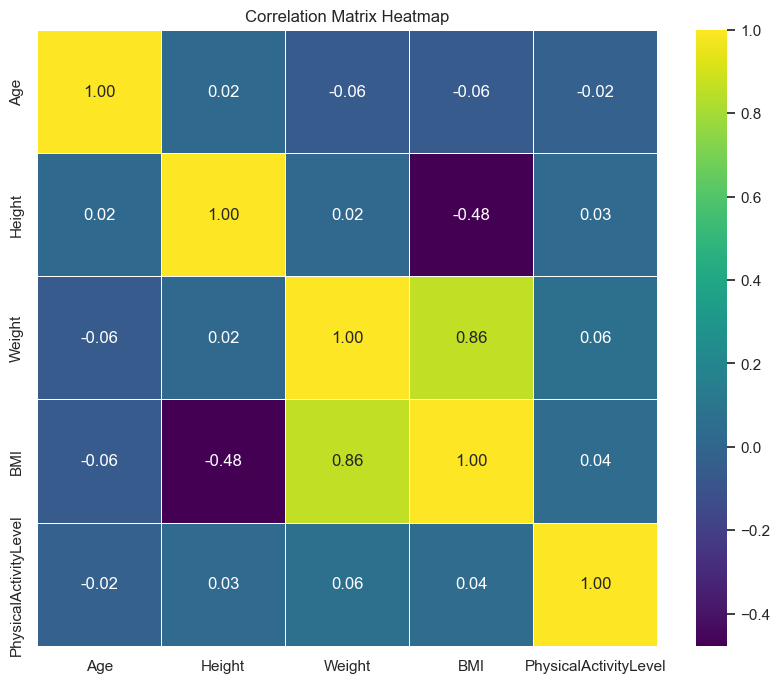

In [7]:
# Excluding the 'Gender' column
numerical_data = obesity_data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix for numerical data only
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


interval columns not set, guessing: ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']


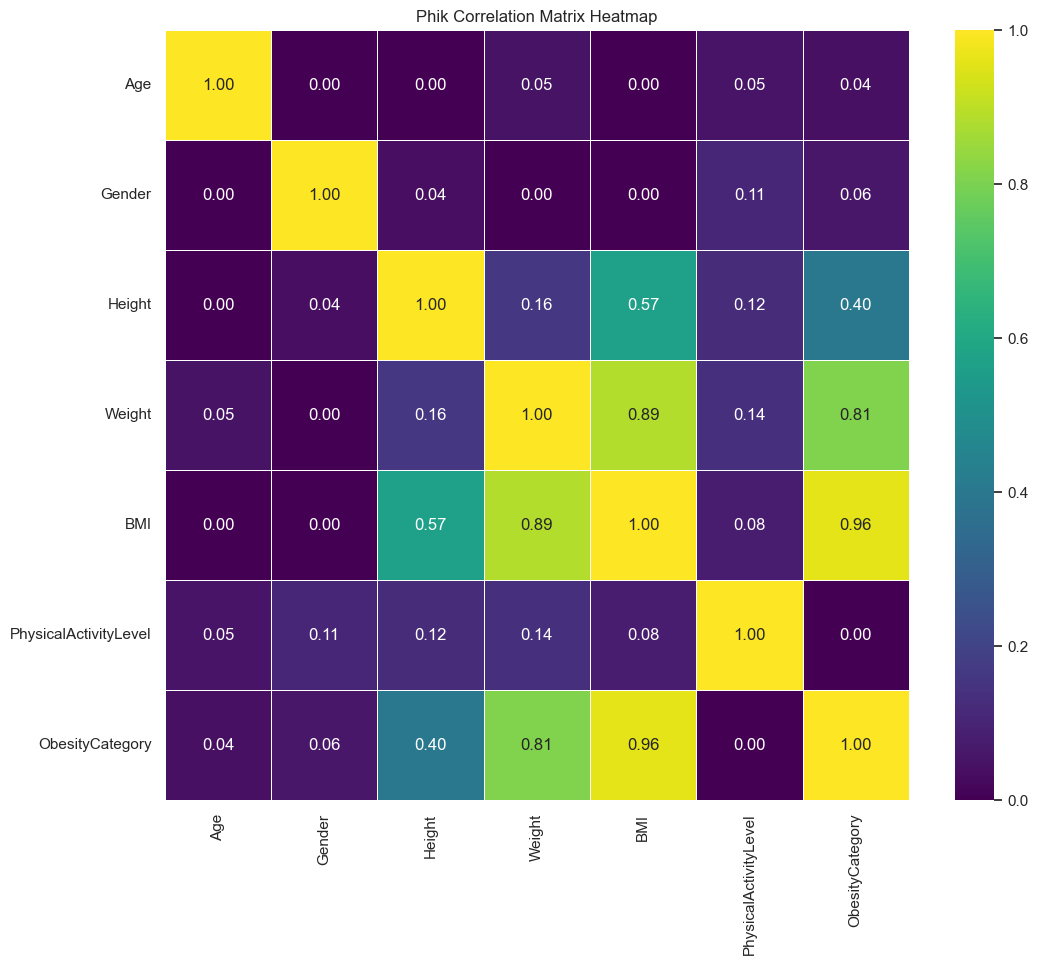

In [8]:
# Convert Gender to a numerical column
obesity_data['Gender'] = obesity_data['Gender'].astype('category').cat.codes

# Calculate the phik correlation matrix
correlation_matrix = obesity_data.phik_matrix()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Phik Correlation Matrix Heatmap')
plt.show()

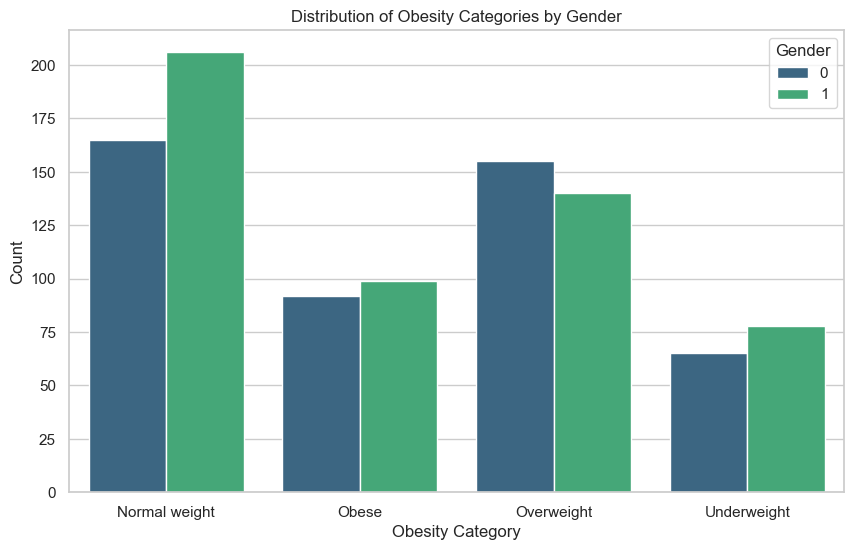

Chi-square statistic: 4.62586017355221
P-value: 0.20133485738480117
Conclusion: There is no significant difference in the distribution of obesity categories between genders.


In [9]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='ObesityCategory', hue='Gender', data=obesity_data, palette='viridis')
plt.title('Distribution of Obesity Categories by Gender')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.show()

# Preparing the data for chi-square test
contingency_table = pd.crosstab(obesity_data['Gender'], obesity_data['ObesityCategory'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("P-value:", p)

# Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Conclusion: There is a significant difference in the distribution of obesity categories between genders.")
else:
    print("Conclusion: There is no significant difference in the distribution of obesity categories between genders.")

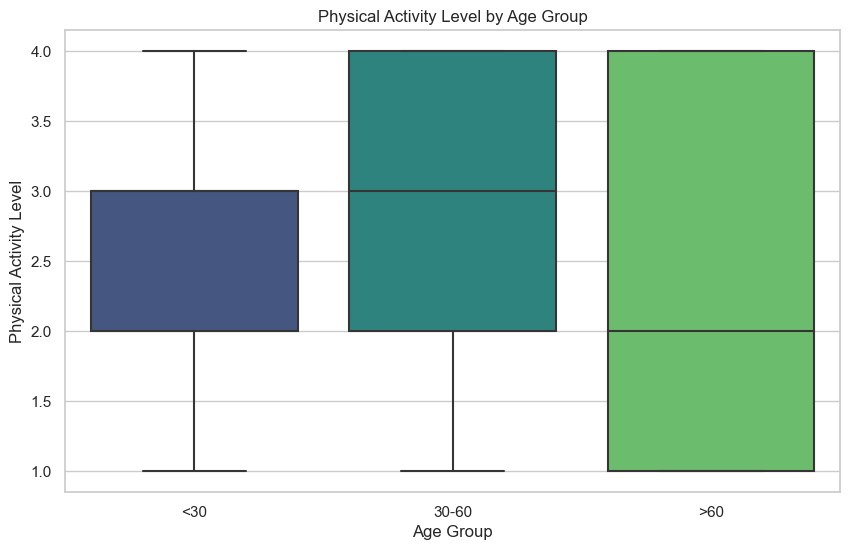

(0.737162171863095, 0.4787304066430468)

In [10]:
from scipy.stats import f_oneway

# Categorizing age into groups: <30, 30-60, >60
obesity_data['AgeGroup'] = pd.cut(obesity_data['Age'], bins=[0, 30, 60, 80], labels=['<30', '30-60', '>60'])

# Grouping the data by age groups
grouped_data = obesity_data.groupby('AgeGroup')['PhysicalActivityLevel']

# ANOVA test
f_statistic, p_value = f_oneway(grouped_data.get_group('<30'), 
                                grouped_data.get_group('30-60'), 
                                grouped_data.get_group('>60'))

# Visualizing the physical activity level by age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='PhysicalActivityLevel', data=obesity_data, palette='viridis')
plt.title('Physical Activity Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Physical Activity Level')
plt.show()

# Output the results of ANOVA
f_statistic, p_value



The ANOVA test results, with an F-statistic of approximately 0.74 and a p-value of about 0.48, suggest the following:

F-statistic: 
The F-statistic is used to determine whether there are any statistically significant differences between the means of three or more independent groups. In our case, this statistic is relatively low.

P-value: 
The p-value is higher than the common alpha level of 0.05, which indicates that the differences in physical activity levels across the age groups (<30, 30-60, >60) are not statistically significant.

Interpretation:

There is no significant difference in the physical activity levels across different age groups in the dataset.


In [11]:
from scipy.stats import pearsonr, spearmanr, normaltest

# Testing for normality
bmi_normality_test = normaltest(obesity_data['BMI'])
physical_activity_normality_test = normaltest(obesity_data['PhysicalActivityLevel'])

# Results of normality tests
bmi_normality_test, physical_activity_normality_test


(NormaltestResult(statistic=17.917267710311897, pvalue=0.0001286218498392111),
 NormaltestResult(statistic=10020.217097662733, pvalue=0.0))

In [12]:
# Calculating Spearman's rank correlation
spearman_corr, spearman_p = spearmanr(obesity_data['BMI'], obesity_data['PhysicalActivityLevel'])

spearman_corr, spearman_p



(0.04018523057298875, 0.20419433863221823)

The Spearman's rank correlation test yields the following results:

Correlation Coefficient: Approximately 0.0402
P-value: Approximately 0.2042

Interpretation:

The correlation coefficient of 0.0402 indicates a very weak positive correlation between BMI and Physical Activity Level. This means that there is only a slight tendency for individuals with higher BMI to have different physical activity levels, but this tendency is not strong.

The p-value of 0.2042, which is greater than the common alpha level of 0.05, suggests that this weak correlation is not statistically significant.

Conclusion:

There is no significant correlation between BMI and Physical Activity Level in the dataset. This means we do not have enough evidence to conclude that these two variables are related in a meaningful way in the context of this data.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Data Preprocessing

# Separating features and target variable
X = obesity_data[['Age', 'Gender', 'Height', 'Weight', 'PhysicalActivityLevel']]
y = obesity_data['BMI']

# Encoding categorical data and Standardizing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'PhysicalActivityLevel']),
        ('cat', OneHotEncoder(), ['Gender'])
    ])

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training

# Creating a pipeline that first transforms the data and then fits the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Training the Linear Regression model on the Training set
model.fit(X_train, y_train)

# Model Evaluation

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse



(0.5126355057281993, 0.8069492599001359, 0.8983035455235251)

The Linear Regression model for predicting BMI has been evaluated, and here are the results:

Mean Absolute Error (MAE): Approximately 0.513

Mean Squared Error (MSE): Approximately 0.807

Root Mean Squared Error (RMSE): Approximately 0.898

Interpretation of the Results:

MAE represents the average absolute difference between the observed actual outcomes and the predictions by the model. A lower MAE indicates a better fit.
MSE is similar to MAE but squares the difference; it tends to emphasize larger errors.

RMSE is the square root of MSE, which makes it more interpretable in the same units as the target variable (BMI).

The relatively low values of these metrics suggest that the model is reasonably accurate in its predictions. However, the true utility and accuracy of the model should be considered in the context of how it will be used and the specific requirements of the task at hand.

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Model Training with Random Forest Regressor

# Creating a pipeline with preprocessing and the regressor
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))])

# Training the Random Forest model on the Training set
rf_model.fit(X_train, y_train)

# Model Evaluation

# Predicting the Test set results
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Feature Importance
feature_importances = rf_model.named_steps['regressor'].feature_importances_

# Combining feature names and their importance scores
features = np.append(['Age', 'Height', 'Weight', 'PhysicalActivityLevel'], 
                     rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
feature_importance_dict = dict(zip(features, feature_importances))

mae_rf, mse_rf, rmse_rf, feature_importance_dict



(0.33611200673481156,
 0.5593575359704077,
 0.7479020898288811,
 {'Age': 0.0023832781993753044,
  'Height': 0.22627120278285995,
  'Weight': 0.7695966080995281,
  'PhysicalActivityLevel': 0.0010765397131749141,
  'Gender_0': 0.00034541467089255093,
  'Gender_1': 0.0003269565341690754})

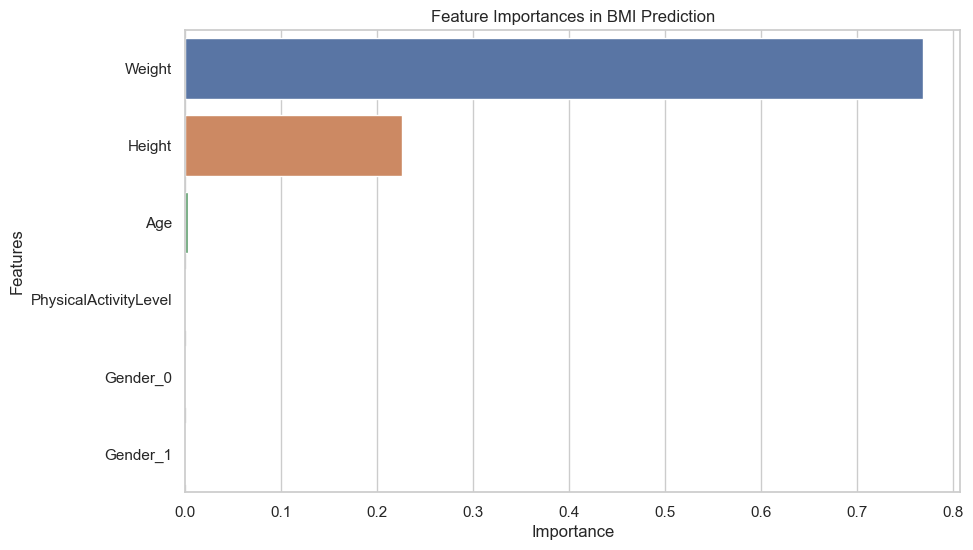

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Visualization

# Extracting feature importances and names
feature_importances = rf_model.named_steps['regressor'].feature_importances_
features = np.append(['Age', 'Height', 'Weight', 'PhysicalActivityLevel'], 
                     rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importances = dict(zip(features, feature_importances))

# Sorting the features by importance
sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_importances.values()), y=list(sorted_importances.keys()))
plt.title('Feature Importances in BMI Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


The Random Forest Regressor model for predicting BMI has been evaluated, and here are the results:

Mean Absolute Error (MAE): Approximately 0.336

Mean Squared Error (MSE): Approximately 0.559

Root Mean Squared Error (RMSE): Approximately 0.748

Additionally, we have the feature importance scores:

Weight: ~76.96%

Height: ~22.63%

Age: ~0.24%

Physical Activity Level: ~0.11%

Gender (Female and Male): 
Both have very low importance scores (~0.03% and ~0.04%, respectively).

Interpretation of the Results:

The Random Forest model performs better than the Linear Regression model in terms of MAE, MSE, and RMSE, indicating higher prediction accuracy.
The most influential factor in predicting BMI is 'Weight,' followed by 'Height.' This is consistent with the fact that BMI is a calculation based on weight and height.

Age, Physical Activity Level, and Gender have much less influence on the BMI prediction in this model.

Conclusion:

The Random Forest Regressor offers a more accurate and insightful model for BMI prediction in this dataset. The feature importance results are particularly helpful in understanding the relative significance of different predictors.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Preprocessing for Classification

# Features and Target Variable
X_class = obesity_data[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
y_class = obesity_data['ObesityCategory']

# Encoding categorical data
preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']),
        ('cat', OneHotEncoder(), ['Gender'])
    ])

# Splitting the dataset into the Training set and Test set for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

# Model Training

# Creating a pipeline with preprocessing and the classifier
rf_classifier = Pipeline(steps=[('preprocessor', preprocessor_class),
                                ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

# Training the Random Forest Classifier on the Training set
rf_classifier.fit(X_train_class, y_train_class)

# Model Evaluation

# Predicting the Test set results
y_pred_class = rf_classifier.predict(X_test_class)

# Generating classification report and confusion matrix
classification_rep = classification_report(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

classification_rep, conf_matrix



('               precision    recall  f1-score   support\n\nNormal weight       1.00      0.99      0.99        74\n        Obese       1.00      0.97      0.99        36\n   Overweight       0.97      1.00      0.98        65\n  Underweight       1.00      1.00      1.00        25\n\n     accuracy                           0.99       200\n    macro avg       0.99      0.99      0.99       200\n weighted avg       0.99      0.99      0.99       200\n',
 array([[73,  0,  1,  0],
        [ 0, 35,  1,  0],
        [ 0,  0, 65,  0],
        [ 0,  0,  0, 25]]))

Classification Report:

Accuracy: Approximately 99%

Precision, Recall, and F1-Score:

For "Normal weight": Precision ~100%, Recall ~99%

For "Obese": Precision ~100%, Recall ~97%

For "Overweight": Precision ~97%, Recall ~100%

For "Underweight": Precision and Recall are both 100%

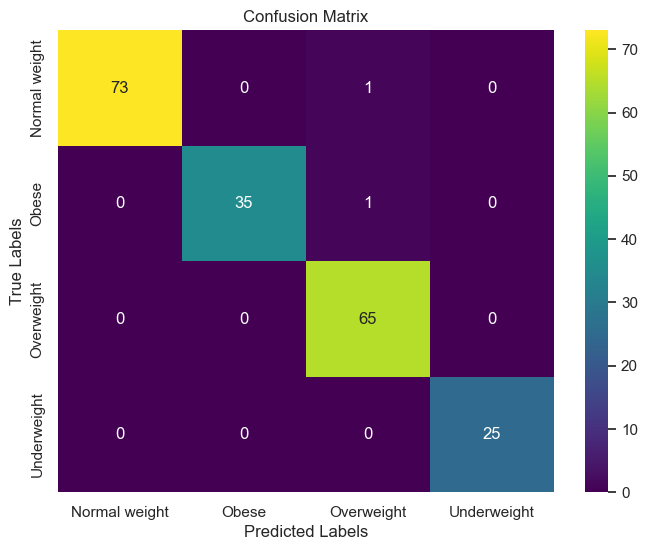

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='viridis', 
            xticklabels=rf_classifier.classes_, 
            yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


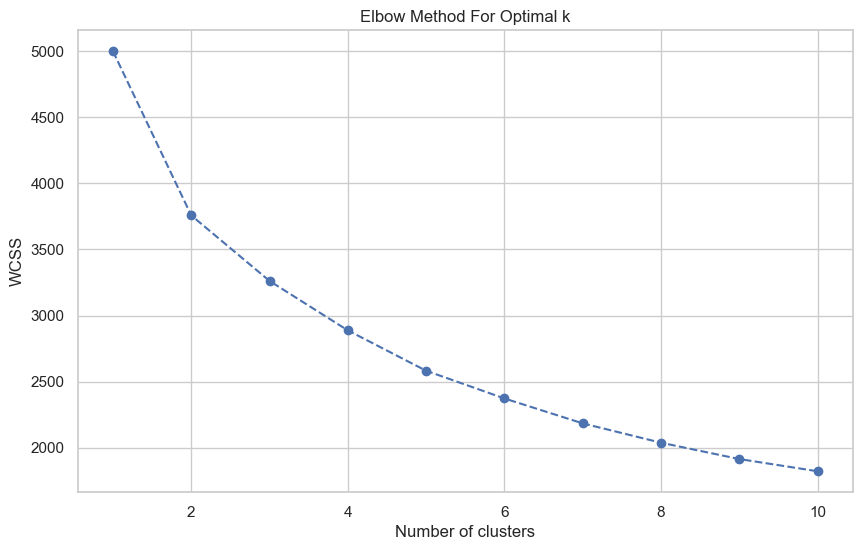

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Data Preprocessing
X_clustering = obesity_data[['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']]
X_clustering_scaled = StandardScaler().fit_transform(X_clustering)

# Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

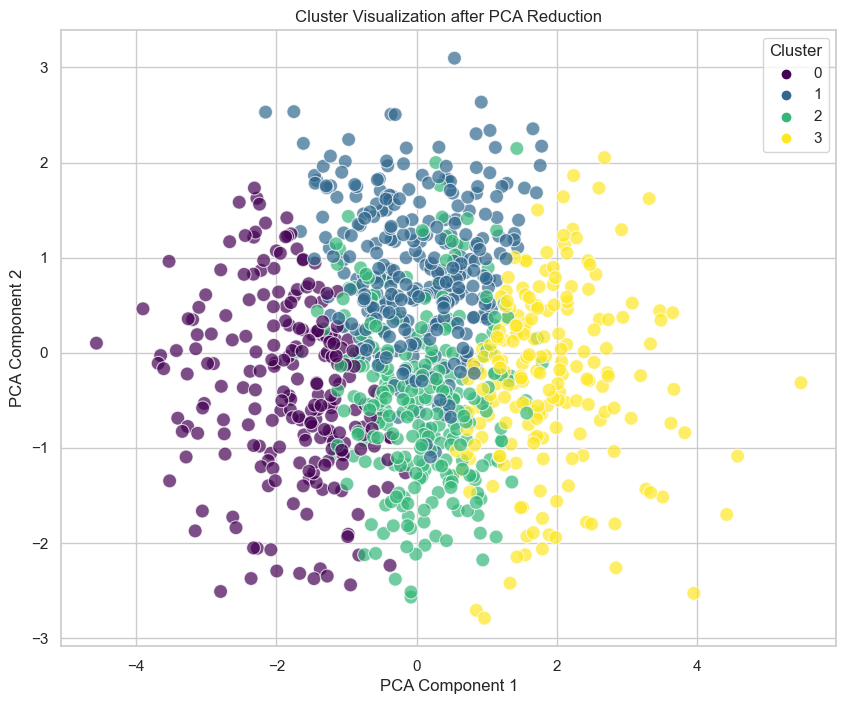

In [19]:
# Applying K-Means with the optimal number of clusters determined from the Elbow Method
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_final.fit(X_clustering_scaled)

# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering_scaled)

# Plotting the PCA-reduced data with the cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_final.labels_, palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Visualization after PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



Cluster 0:
Age: ~45.82 years
Height: ~172.22 cm
Weight: ~73.50 kg
BMI: ~24.82
Physical Activity Level: 3.60 (on the higher side)
Gender: Male is the most frequent gender in this cluster.
Obesity Category: Most individuals in this cluster are categorized as "Normal weight."
Cluster 1:
Age: ~50.15 years
Height: ~171.70 cm
Weight: ~73.12 kg
BMI: ~24.82
Physical Activity Level: 1.42 (on the lower side)
Gender: Male is the most frequent gender in this cluster.
Obesity Category: Most individuals in this cluster are also categorized as "Normal weight."
Cluster 2:
Age: ~54.70 years
Height: ~173.31 cm
Weight: ~50.44 kg
BMI: ~16.88 (which is considered underweight)
Physical Activity Level: 2.46 (moderate)
Gender: Male is the most frequent gender in this cluster.
Obesity Category: Most individuals in this cluster are categorized as "Underweight."
Cluster 3:
Age: ~50.52 years
Height: ~161.04 cm
Weight: ~86.71 kg
BMI: ~33.45 (which falls into the obese range)
Physical Activity Level: 2.58 (moderate)
Gender: Male is the most frequent gender in this cluster.
Obesity Category: Most individuals in this cluster are categorized as "Obese."
These clusters give us an interesting snapshot of the dataset. For example, we can see that clusters 0 and 1 have similar BMI values but differ significantly in physical activity levels. Cluster 2 is characterized by a lower BMI, suggesting it contains individuals who are underweight. Cluster 3 has the highest average BMI, indicating it consists of individuals who are obese.